## Waste classification using CNN

In [1]:
#pip install opencv-python

In [2]:
#pip install tensorflow pandas numpy matplotlib tqdm

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# defining the path for the dataset
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [5]:
# importing nessesary tf and keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [6]:
# visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'Image':x_data, 'Label':y_data})

100%|██████████| 9999/9999 [01:07<00:00, 147.21it/s]


In [7]:
data.shape

(22564, 2)

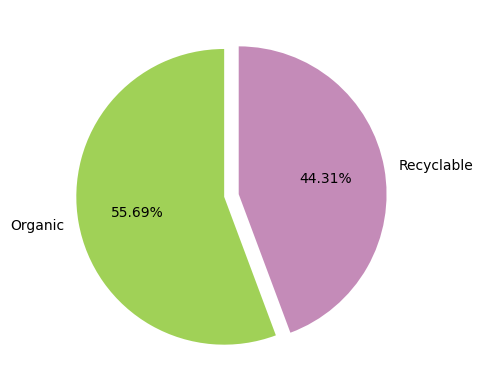

In [8]:
colors =['#a0d157', '#c48bb8']
plt.pie(data.Label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90, explode=(0.1, 0))
plt.show()

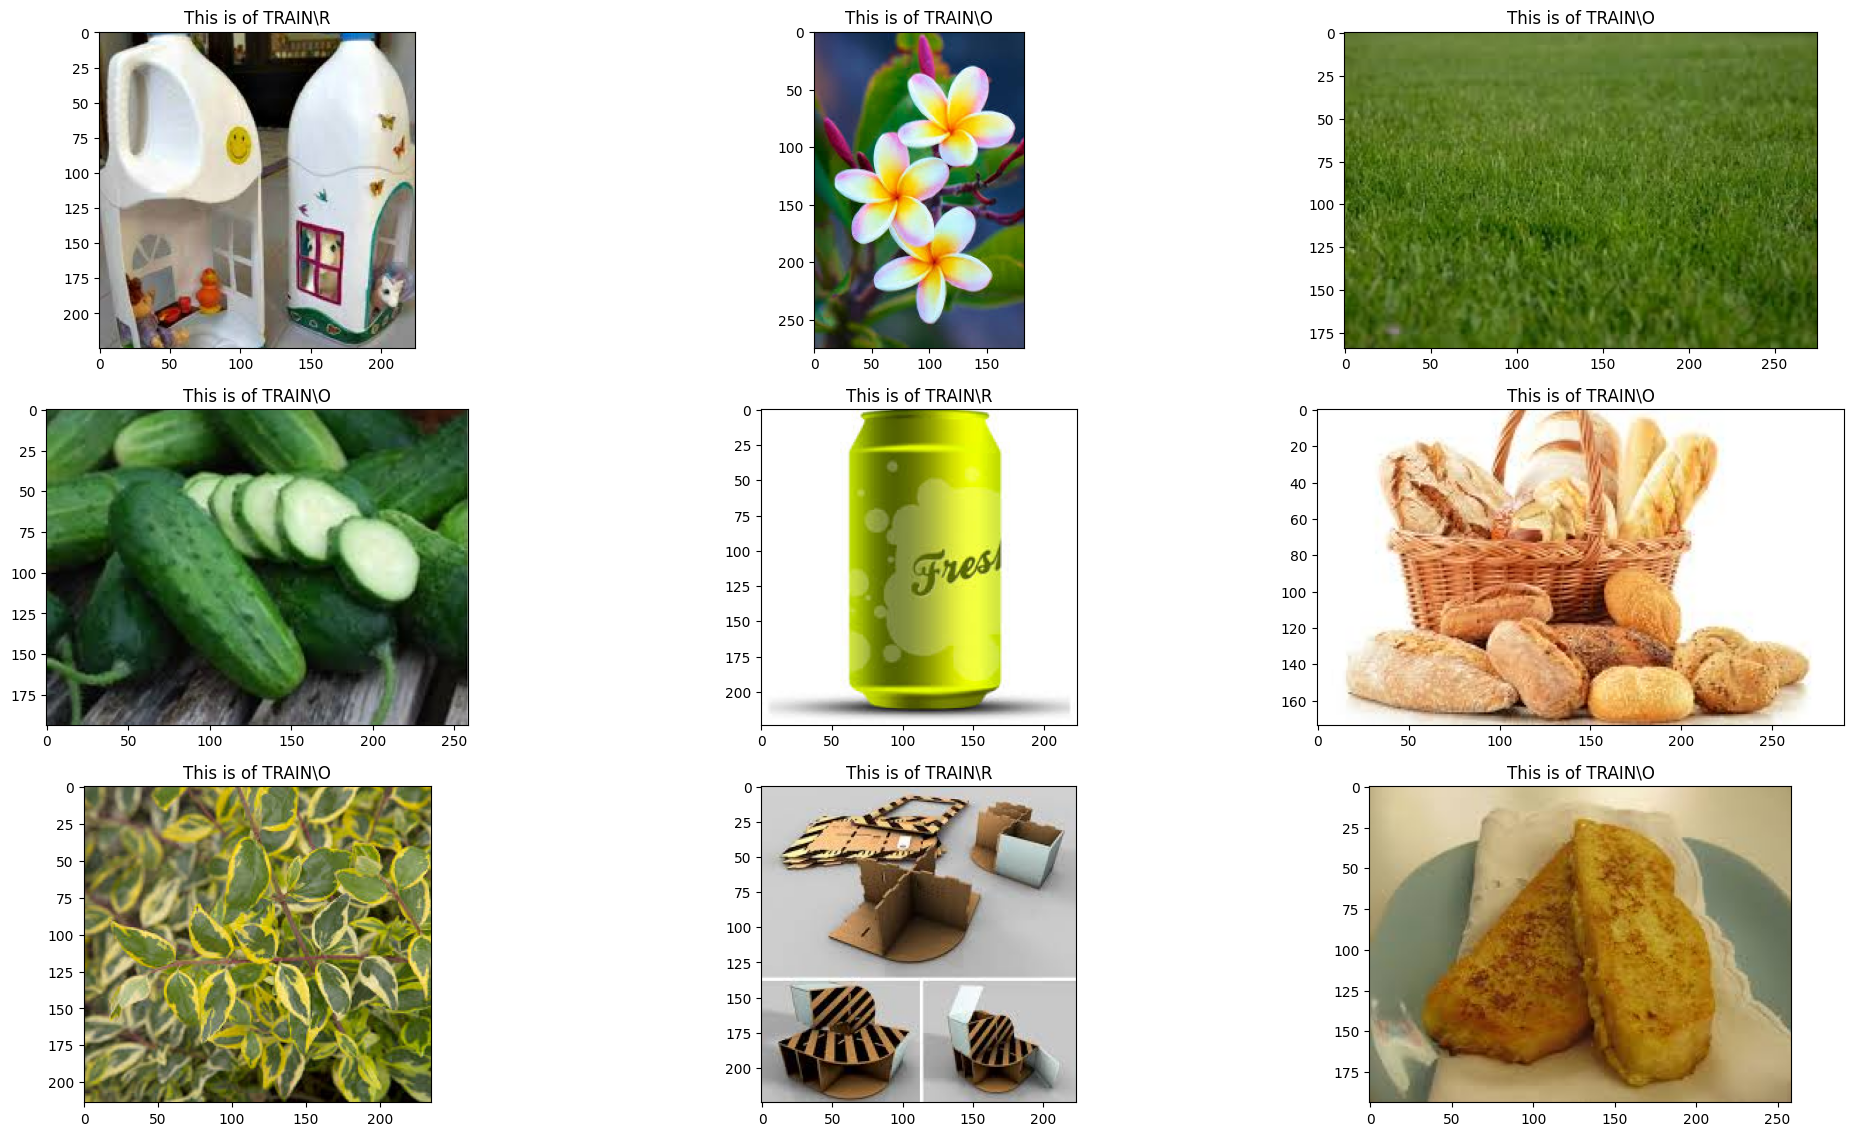

In [9]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format (data.Label[index]))
    plt.imshow(data.Image[index])
    plt.tight_layout()
    

## CNN Convolution Neural Network

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))

model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
batchSize = 256


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batchSize,
        color_mode='rgb',
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(  
        test_path,
        target_size=(224, 224),
        batch_size=batchSize,
        color_mode='rgb',
        class_mode='categorical') 

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator
      )

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3960s 44s/step - accuracy: 0.6569 - loss: 0.7875 - val_accuracy: 0.8707 - val_loss: 0.3743
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3868s 44s/step - accuracy: 0.8234 - loss: 0.4203 - val_accuracy: 0.8365 - val_loss: 0.4013
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3825s 43s/step - accuracy: 0.8440 - loss: 0.3803 - val_accuracy: 0.8790 - val_loss: 0.3043
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3843s 43s/step - accuracy: 0.8575 - loss: 0.3501 - val_accuracy: 0.8794 - val_loss: 0.2999
Epoch 5/10
 5/89 ━━━━━━━━━━━━━━━━━━━━ 1:08:30 49s/step - accuracy: 0.8952 - loss: 0.2903